In [20]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import numpy as np
import os
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

In [44]:
wandb.init(project="cifar")
config = wandb.config
config.dropout = 0.25
config.dense_layer_nodes = 100
config.learn_rate = 0.08
config.batch_size = 256
config.epochs = 50

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(class_names)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


W&B Run: https://app.wandb.ai/l2k2/cifar/runs/swfj8tg9
Call `%%wandb` in the cell containing your training loop to display live results.


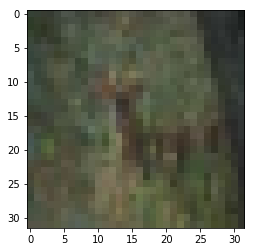

In [22]:
plt.imshow(X_train[10])

In [45]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [60]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [62]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(config.dropout))

model.add(Flatten())
model.add(Dense(config.dense_layer_nodes, activation='relu'))
model.add(Dropout(config.dropout))
model.add(Dense(num_classes, activation='softmax'))

In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


In [58]:
wandb.init()
model.fit(X_train,y_train,batch_size=config.batch_size,
                        epochs=10,
                        validation_data=(X_test, y_test),
                        callbacks=[WandbCallback()]
)

W&B Run: https://app.wandb.ai/l2k2/cifar/runs/1iangnps
Call `%%wandb` in the cell containing your training loop to display live results.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
41984/50000 [========================>.....] - ETA: 0s - loss: 14.5041 - acc: 0.1001

KeyboardInterrupt: 

In [54]:
datagen = ImageDataGenerator()
datagen.fit(X_train)

In [64]:
wandb.init()
model.fit_generator(datagen.flow(X_train, y_train, batch_size=config.batch_size),
                        steps_per_epoch=X_train.shape[0] // config.batch_size,
                        epochs=config.epochs,
                        validation_data=(X_test, y_test),
                        callbacks=[WandbCallback()]
)

W&B Run: https://app.wandb.ai/l2k2/cifar/runs/ttmv2et0
Call `%%wandb` in the cell containing your training loop to display live results.
Epoch 1/50
195/195 [==============================] - 4s 22ms/step - loss: 1.7466 - acc: 0.3694 - val_loss: 1.4266 - val_acc: 0.5002
Epoch 2/50
195/195 [==============================] - 3s 18ms/step - loss: 1.4290 - acc: 0.4907 - val_loss: 1.2862 - val_acc: 0.5508
Epoch 3/50
195/195 [==============================] - 3s 17ms/step - loss: 1.3255 - acc: 0.5274 - val_loss: 1.2441 - val_acc: 0.5552
Epoch 4/50
195/195 [==============================] - 3s 18ms/step - loss: 1.2632 - acc: 0.5495 - val_loss: 1.1661 - val_acc: 0.5911
Epoch 5/50
195/195 [==============================] - 3s 17ms/step - loss: 1.2098 - acc: 0.5684 - val_loss: 1.1425 - val_acc: 0.5955
Epoch 6/50
195/195 [==============================] - 3s 17ms/step - loss: 1.1777 - acc: 0.5800 - val_loss: 1.1234 - val_acc: 0.6016
Epoch 7/50
195/195 [==============================] - 3s 17ms/ste

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0.

TypeError: 'method' object is not subscriptable